# **Ondas en una cuerda tensa**

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib notebook

In [76]:
# Datos

L = 1.0 #longitud de la cuerda
T = 10.0 #tension
mu = 1e-3 #densidad lineal de la cuerda
v = np.sqrt(T/mu) #velocidad de propagacion
dx = 1.0e-2
dt = 1.0e-4
C = v*(dt/dx)

In [77]:
C

1.0

In [84]:
# Desplazamiento vertical
y = np.zeros((101,200)) # y[filas=x][columnas=t]

#Condiciones iniciales
for i in range(0,81): y[i,0] = 1.25*dx*i
for i in range(81,101): y[i,0] = 5 - 5*dx*i

#Algoritmo
for i in range(1,100): 
    y[i,1] = y[i,0] + ((C)**2/2)*(y[i+1,0] + y[i-1,0] - 2*y[i,0])

for j in range(1,199):
    for i in range(1,100):
        y[i,j+1] = 2*y[i,j] - y[i,j-1] + ((C)**2)*(y[i+1,j] + y[i-1,j] - 2*y[i,j])

<IPython.core.display.Javascript object>


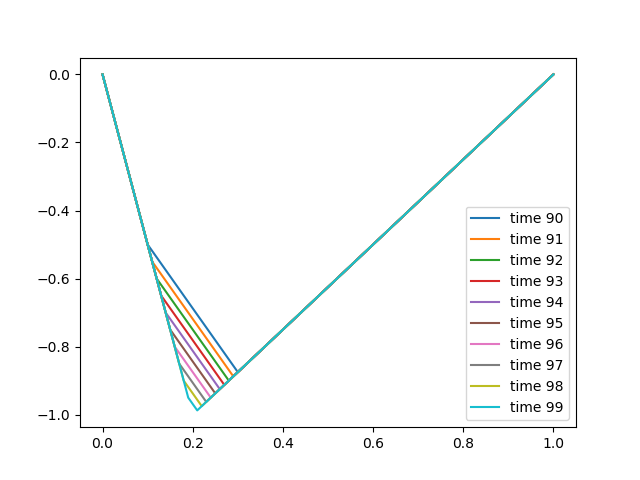

In [86]:
# Plot 

x_plot = np.linspace(0,1,101)

for i in range(90,100):
    y_plot = y[:,i]
    plt.plot(x_plot,y_plot,label='time {0}'.format(i))
    plt.legend()

<IPython.core.display.Javascript object>


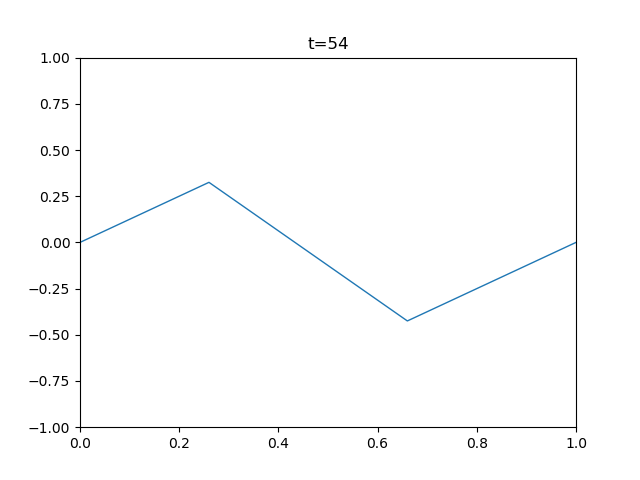

In [87]:
#Animation
    
fig = plt.figure()
ax = plt.axes(xlim=(0, 1),ylim=(-1,1))

line, = ax.plot([], [], lw=1) #linea

#funcion para iniciar
def init():
    line.set_data([], []) 
    return line,

#funcion para iterar
def animate(i):
    x_an = np.linspace(0,1,101)
    y_an = y[:,i]
    ax.set_title('t={0}'.format(i))
    line.set_data(x_an, y_an)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
